In [49]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pycaret.classification import *
# data = get_data('diabetes')


In [50]:
df = pd.read_csv('../../datasets/loan_approval_dataset.csv').head(1000)

In [51]:
df.head()

,Unnamed: 0,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [52]:
df.drop(columns=['Unnamed: 0','Id'],inplace=True)

In [53]:
data=df.copy()


✅ Setup

In [54]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment 
from pycaret.classification import * 
exp = ClassificationExperiment()

In [55]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [56]:
# init setup on exp
exp.setup(data, target = 'Risk_Flag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Risk_Flag
2,Target type,Binary
3,Original data shape,"(1000, 12)"
4,Transformed data shape,"(1000, 14)"
5,Transformed train set shape,"(700, 14)"
6,Transformed test set shape,"(300, 14)"
7,Numeric features,5
8,Categorical features,6
9,Preprocess,True


In [57]:
# check all available config
# from pycaret.classification import get_config
# get_config()

In [58]:
# lets access X_train_transformed
# get_config('X_train_transformed')

In [59]:

# # another example: let's access seed
# print("The current seed is: {}".format(get_config('seed')))

# # now lets change it using set_config
# set_config('seed', 786)
# print("The new seed is: {}".format(get_config('seed')))

In [60]:
# init setup with normalize = True

s = setup(data, target = 'Risk_Flag', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Risk_Flag
2,Target type,Binary
3,Original data shape,"(1000, 12)"
4,Transformed data shape,"(1000, 14)"
5,Transformed train set shape,"(700, 14)"
6,Transformed test set shape,"(300, 14)"
7,Numeric features,5
8,Categorical features,6
9,Preprocess,True


In [61]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<Axes: >

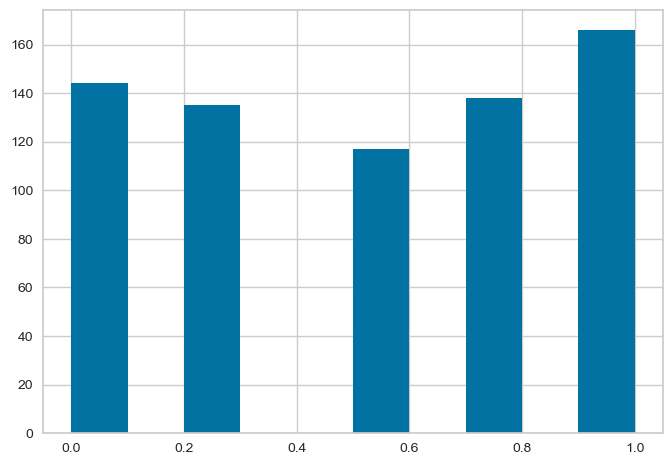

In [62]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['CURRENT_HOUSE_YRS'].hist()

<Axes: >

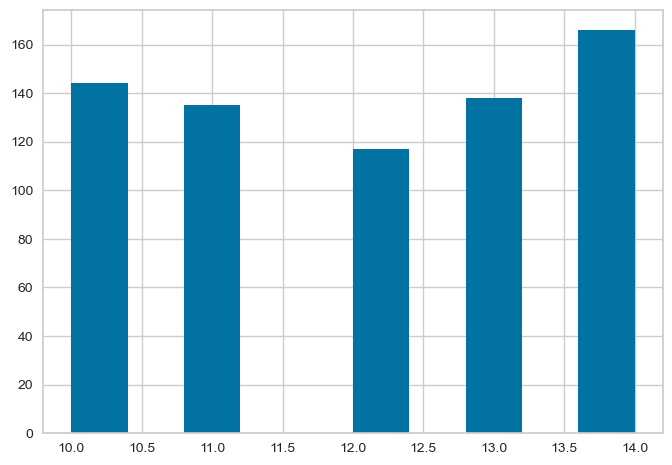

In [63]:
get_config('X_train')['CURRENT_HOUSE_YRS'].hist()


✅ Compare Models

In [64]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8314,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1760
rf,Random Forest Classifier,0.7971,0.5639,0.1424,0.2842,0.1832,0.0853,0.0934,0.3820
knn,K Neighbors Classifier,0.7886,0.5375,0.1008,0.2017,0.1319,0.0332,0.0336,0.2640
et,Extra Trees Classifier,0.7829,0.5841,0.1091,0.2002,0.1375,0.0330,0.0338,0.3380
lr,Logistic Regression,0.7743,0.5859,0.1174,0.2044,0.1447,0.0286,0.0307,4.4250
ridge,Ridge Classifier,0.7700,0.5665,0.1258,0.1776,0.1450,0.0244,0.0220,0.2020
lda,Linear Discriminant Analysis,0.7629,0.5659,0.2356,0.2747,0.2505,0.1120,0.1136,0.1440
gbc,Gradient Boosting Classifier,0.7614,0.5679,0.1424,0.2067,0.1630,0.0316,0.0343,0.2870
lightgbm,Light Gradient Boosting Machine,0.7586,0.5901,0.1765,0.2385,0.1936,0.0578,0.0626,0.3180
ada,Ada Boost Classifier,0.7500,0.5760,0.2008,0.2500,0.2164,0.0718,0.0749,0.2460


In [65]:

# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [66]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8314,0.5497,0.0000,0.0000,0.0000,0.0000,0.0000,0.1920
nb,Naive Bayes,0.8314,0.5038,0.0000,0.0000,0.0000,0.0000,0.0000,0.1630
dummy,Dummy Classifier,0.8314,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1370
knn,K Neighbors Classifier,0.8014,0.5005,0.0083,0.0333,0.0133,-0.0421,-0.0558,0.1560
ridge,Ridge Classifier,0.8014,0.5875,0.0083,0.0250,0.0125,-0.0424,-0.0603,0.1360
rf,Random Forest Classifier,0.7943,0.5680,0.1424,0.2796,0.1812,0.0805,0.0888,0.3600
et,Extra Trees Classifier,0.7829,0.5841,0.1091,0.2002,0.1375,0.0330,0.0338,0.3900
svm,SVM - Linear Kernel,0.7629,0.4601,0.1000,0.0157,0.0272,0.0000,0.0000,0.1680
lda,Linear Discriminant Analysis,0.7629,0.5659,0.2356,0.2747,0.2505,0.1120,0.1136,0.2020
gbc,Gradient Boosting Classifier,0.7614,0.5679,0.1424,0.2067,0.1630,0.0316,0.0343,0.4760


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [68]:
best_models = pull()

In [69]:
best_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8314,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176
rf,Random Forest Classifier,0.7971,0.5639,0.1424,0.2842,0.1832,0.0853,0.0934,0.382
knn,K Neighbors Classifier,0.7886,0.5375,0.1008,0.2017,0.1319,0.0332,0.0336,0.264
et,Extra Trees Classifier,0.7829,0.5841,0.1091,0.2002,0.1375,0.0330,0.0338,0.338
lr,Logistic Regression,0.7743,0.5859,0.1174,0.2044,0.1447,0.0286,0.0307,4.425
ridge,Ridge Classifier,0.7700,0.5665,0.1258,0.1776,0.1450,0.0244,0.0220,0.202
lda,Linear Discriminant Analysis,0.7629,0.5659,0.2356,0.2747,0.2505,0.1120,0.1136,0.144
gbc,Gradient Boosting Classifier,0.7614,0.5679,0.1424,0.2067,0.1630,0.0316,0.0343,0.287
lightgbm,Light Gradient Boosting Machine,0.7586,0.5901,0.1765,0.2385,0.1936,0.0578,0.0626,0.318
ada,Ada Boost Classifier,0.7500,0.5760,0.2008,0.2500,0.2164,0.0718,0.0749,0.246


In [70]:
# best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

In [71]:
#  list of top 3 models by Recall
# best_recall_models_top3 = pull()

In [72]:
# best_recall_models_top3.sort_values(by='Accuracy')

In [73]:
# compare_tree_models_results = pull()
# compare_tree_models_results

✅ Set Custom Metrics

In [74]:
# check available metrics used in CV
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000002A566457740>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000002A566457...,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000002A566457...,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


## Analyze Model

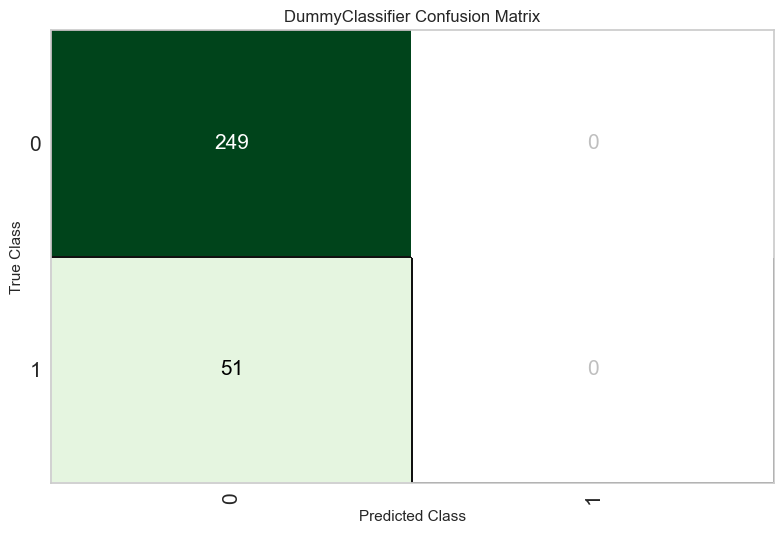

In [75]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

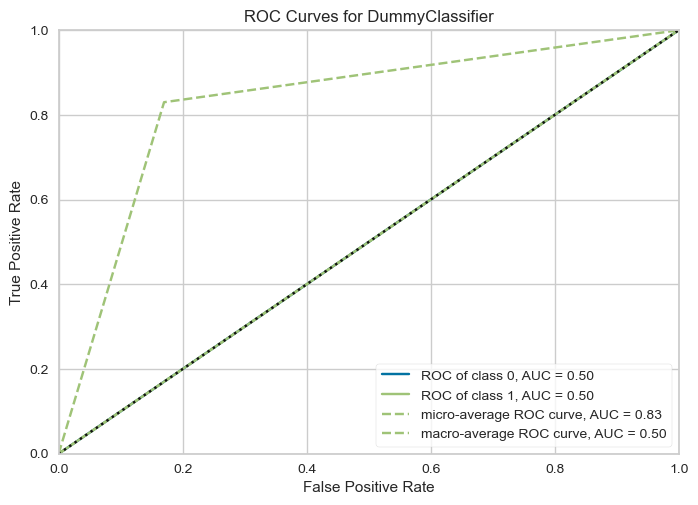

In [76]:
# plot AUC
plot_model(best, plot = 'auc')

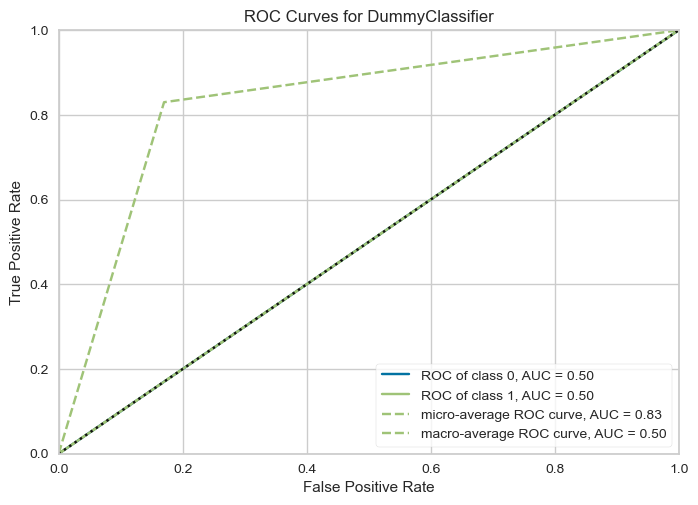

In [77]:
# plot AUC
plot_model(best, plot = 'auc')

In [78]:
plot_model(best, plot = 'feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

## Evaluate Model 

In [79]:
evaluate_model(best) # can be used only in notebook 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction

In [80]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.8300,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [81]:
# show predictions df
holdout_pred.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,prediction_label,prediction_score
68,8788135,77,7,married,rented,no,Petroleum_Engineer,Ongole,Andhra_Pradesh,7,11,0,0,0.8314
444,9434706,30,9,single,rented,no,Secretary,Shimoga,Karnataka,9,13,0,0,0.8314
874,9211842,61,16,single,rented,no,Computer_hardware_engineer,Bettiah[33],Bihar,11,11,1,0,0.8314
244,9507533,32,4,married,rented,no,Lawyer,Satna,Madhya_Pradesh,4,11,0,0,0.8314
687,1303925,57,11,single,rented,no,Secretary,Katihar,Bihar,11,14,0,0,0.8314


In [82]:
new_data = data.copy()
new_data.drop('Risk_Flag', axis=1, inplace=True)
new_data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [83]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,prediction_label,prediction_score
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.8314
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.8314
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.8314
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,0,0.8314
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,0,0.8314


## Save Model

In [84]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Income', 'Age', 'Experience',
                                              'CURRENT_JOB_YRS',
                                              'CURRENT_HOUSE_YRS'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrappe...
                 ('normalize',
                  TransformerWrapper(exclude=None, incl

In [85]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## load pipeline

In [86]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\ADMIN\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Income', 'Age', 'Experience',
                                             'CURRENT_JOB_YRS',
                                             'CURRENT_HOUSE_YRS'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),...
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DummyClassifier(constant=None, random_state=123,
                                 strategy='prior'))],
         verbose=False)

In [87]:
loaded_best_pipeline.transform(df)

,Income,Age,Experience,Married/Single,House_Ownership_rented,House_Ownership_norent_noown,House_Ownership_owned,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129497,0.034483,0.15,1.0,1.0,0.0,0.0,0.0,0.364251,0.091985,0.299673,0.214286,0.75,0
1,0.757263,0.327586,0.50,1.0,1.0,0.0,0.0,0.0,0.965412,0.231921,0.941844,0.642857,0.75,0
2,0.398594,0.775862,0.20,0.0,1.0,0.0,0.0,0.0,0.613672,0.079135,0.316959,0.285714,0.00,0
3,0.625310,0.344828,0.10,1.0,1.0,0.0,0.0,1.0,0.965412,0.936620,0.580432,0.142857,0.50,1
4,0.576498,0.448276,0.55,1.0,1.0,0.0,0.0,0.0,0.296518,0.733833,1.000000,0.214286,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.690457,0.586207,0.25,1.0,0.0,0.0,1.0,0.0,0.580227,0.234367,0.359782,0.214286,0.00,0
996,0.925308,0.568966,0.10,1.0,1.0,0.0,0.0,1.0,0.181494,0.445950,0.341152,0.142857,0.50,1
997,0.946519,0.793103,0.70,1.0,0.0,1.0,0.0,1.0,0.101273,0.271586,1.000000,1.000000,0.00,0
998,0.333949,0.034483,0.90,1.0,1.0,0.0,0.0,0.0,0.076663,0.323164,0.580432,0.428571,0.75,0


In [88]:
type(best_models)

pandas.core.frame.DataFrame

In [89]:
best_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.8314,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.176
rf,Random Forest Classifier,0.7971,0.5639,0.1424,0.2842,0.1832,0.0853,0.0934,0.382
knn,K Neighbors Classifier,0.7886,0.5375,0.1008,0.2017,0.1319,0.0332,0.0336,0.264
et,Extra Trees Classifier,0.7829,0.5841,0.1091,0.2002,0.1375,0.0330,0.0338,0.338
lr,Logistic Regression,0.7743,0.5859,0.1174,0.2044,0.1447,0.0286,0.0307,4.425
ridge,Ridge Classifier,0.7700,0.5665,0.1258,0.1776,0.1450,0.0244,0.0220,0.202
lda,Linear Discriminant Analysis,0.7629,0.5659,0.2356,0.2747,0.2505,0.1120,0.1136,0.144
gbc,Gradient Boosting Classifier,0.7614,0.5679,0.1424,0.2067,0.1630,0.0316,0.0343,0.287
lightgbm,Light Gradient Boosting Machine,0.7586,0.5901,0.1765,0.2385,0.1936,0.0578,0.0626,0.318
ada,Ada Boost Classifier,0.7500,0.5760,0.2008,0.2500,0.2164,0.0718,0.0749,0.246


In [90]:
best_models.sort_values(by='F1',ascending=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4386,0.5862,0.7803,0.2074,0.3161,0.0756,0.1364,0.204
nb,Naive Bayes,0.3014,0.6033,0.9500,0.1882,0.3141,0.0457,0.1285,0.146
lda,Linear Discriminant Analysis,0.7629,0.5659,0.2356,0.2747,0.2505,0.1120,0.1136,0.144
dt,Decision Tree Classifier,0.7400,0.5359,0.2280,0.2285,0.2259,0.0716,0.0719,0.143
ada,Ada Boost Classifier,0.7500,0.5760,0.2008,0.2500,0.2164,0.0718,0.0749,0.246
lightgbm,Light Gradient Boosting Machine,0.7586,0.5901,0.1765,0.2385,0.1936,0.0578,0.0626,0.318
rf,Random Forest Classifier,0.7971,0.5639,0.1424,0.2842,0.1832,0.0853,0.0934,0.382
gbc,Gradient Boosting Classifier,0.7614,0.5679,0.1424,0.2067,0.1630,0.0316,0.0343,0.287
svm,SVM - Linear Kernel,0.7400,0.6012,0.1424,0.1754,0.1535,0.0060,0.0057,0.143
ridge,Ridge Classifier,0.7700,0.5665,0.1258,0.1776,0.1450,0.0244,0.0220,0.202


<Axes: >

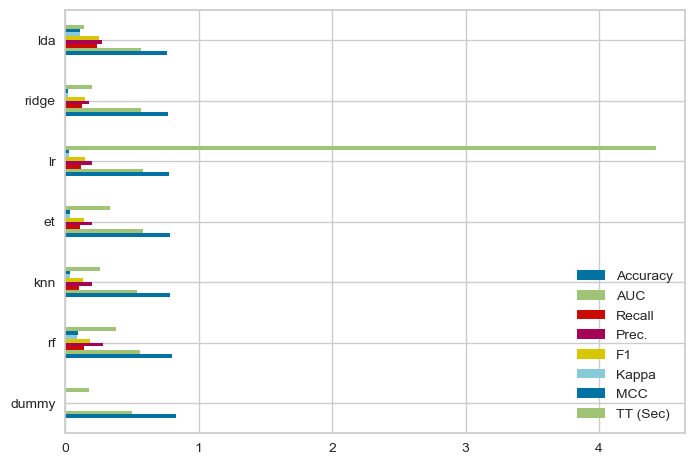

In [91]:
best_models.sort_values(by='Accuracy',ascending=False).head(7).plot(kind='barh')

<Axes: >

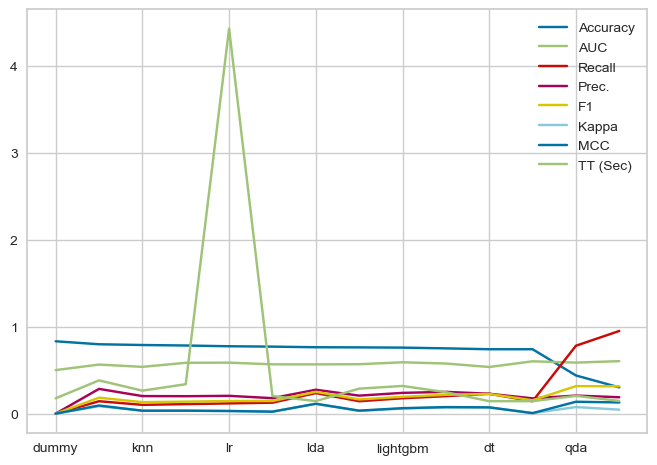

In [92]:
best_models.plot()

Got best model as lightgbm

In [93]:
# train logistic regression with default fold=10
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7286,0.4854,0.1818,0.1667,0.1739,0.0119,0.0119
1,0.7571,0.4946,0.0000,0.0000,0.0000,-0.1248,-0.1322
2,0.7571,0.5862,0.1667,0.2222,0.1905,0.0510,0.0518
3,0.7714,0.6351,0.2500,0.3000,0.2727,0.1385,0.1393
4,0.8286,0.6365,0.2500,0.5000,0.3333,0.2473,0.2669
5,0.6857,0.5603,0.0000,0.0000,0.0000,-0.1846,-0.1857
6,0.8286,0.6106,0.1667,0.5000,0.2500,0.1797,0.2146
7,0.7143,0.5158,0.2500,0.2143,0.2308,0.0566,0.0569
8,0.7714,0.7040,0.4167,0.3571,0.3846,0.2453,0.2464


In [94]:
type(lightgbm)

lightgbm.sklearn.LGBMClassifier

In [95]:
tuned_lightgbm = tune_model(lightgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:25:48
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.3505,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8429,0.4823,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.5704,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.4490,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.6494,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8286,0.4720,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8286,0.5582,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8286,0.3987,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8286,0.6552,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [96]:
org_list=loaded_best_pipeline.transform(df)['Risk_Flag'].head(10)

In [97]:
predict  = lightgbm.predict(loaded_best_pipeline.transform(df).drop(columns='Risk_Flag').head(1))
predict


array([0], dtype=int8)

In [98]:
lst = df.drop(columns='Risk_Flag').head(1)

In [99]:
df.head(1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0


In [100]:
lightgbm.predict(loaded_best_pipeline.transform(lst))

array([0], dtype=int8)

In [101]:
df.iloc[:,3]

0       single
1       single
2      married
3       single
4       single
        ...   
995     single
996     single
997     single
998     single
999    married
Name: Married/Single, Length: 1000, dtype: object

In [102]:
predicted_list=[]
for i in range(1,11):
    predict  = lightgbm.predict(loaded_best_pipeline.transform(df).drop(columns='Risk_Flag').head(i))
    predicted_list.append(predict)
predicted_list=predicted_list[-1]

In [103]:
tuned_predicted_list=[]
for i in range(1,11):
    tuned_predict  = tuned_lightgbm.predict(loaded_best_pipeline.transform(df).drop(columns='Risk_Flag').head(i))
    tuned_predicted_list.append(predict)
tuned_predicted_list=tuned_predicted_list[-1]

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 

In [104]:
compare_dict = {
    'orginal_datapoints':org_list,
    'predicted_datapoints':predicted_list
}
compare_df  = pd.DataFrame(compare_dict)

<Axes: >

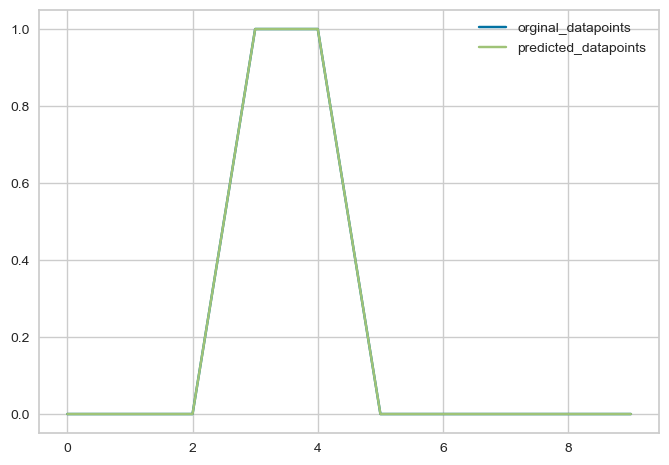

In [105]:
compare_dict = {
    'orginal_datapoints':org_list,
    'predicted_datapoints':tuned_predicted_list
}
tuned_compare_df  = pd.DataFrame(compare_dict)
tuned_compare_df.plot()

<Axes: >

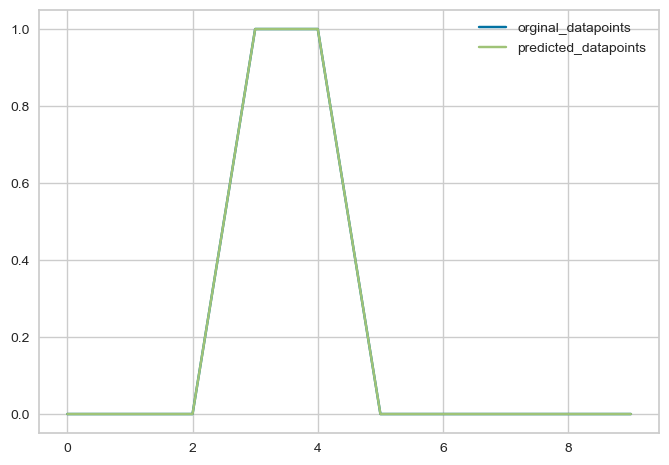

In [106]:
compare_df.plot()

<Axes: ylabel='Fold'>

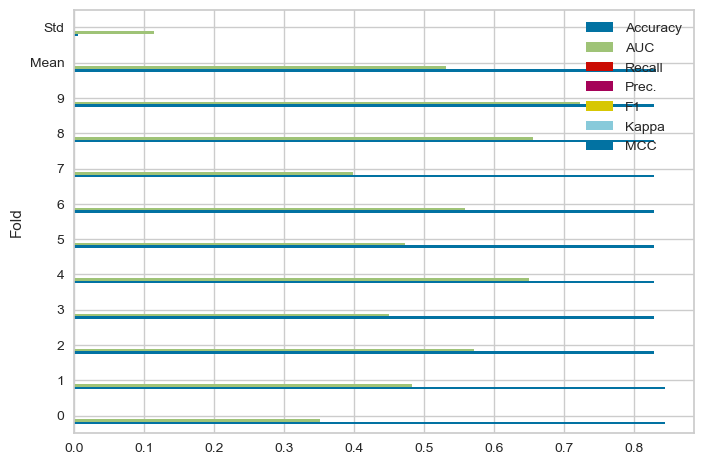

In [107]:
rf_results = pull()
rf_results.plot(kind='barh')

In [108]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.3505,0.0,0.0,0.0,0.0,0.0
1,0.8429,0.4823,0.0,0.0,0.0,0.0,0.0
2,0.8286,0.5704,0.0,0.0,0.0,0.0,0.0
3,0.8286,0.4490,0.0,0.0,0.0,0.0,0.0
4,0.8286,0.6494,0.0,0.0,0.0,0.0,0.0
5,0.8286,0.4720,0.0,0.0,0.0,0.0,0.0
6,0.8286,0.5582,0.0,0.0,0.0,0.0,0.0
7,0.8286,0.3987,0.0,0.0,0.0,0.0,0.0
8,0.8286,0.6552,0.0,0.0,0.0,0.0,0.0



✅ Tune Model

In [109]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.5262,0.2727,0.1875,0.2222,0.0442,0.0454
1,0.7429,0.4777,0.0909,0.1111,0.1000,-0.0483,-0.0486
2,0.7571,0.5560,0.2500,0.2727,0.2609,0.1159,0.1161
3,0.7143,0.4971,0.1667,0.1667,0.1667,-0.0057,-0.0057
4,0.7714,0.5647,0.2500,0.3000,0.2727,0.1385,0.1393
5,0.7000,0.5216,0.2500,0.2000,0.2222,0.0392,0.0396
6,0.8000,0.6149,0.3333,0.4000,0.3636,0.2462,0.2476
7,0.7143,0.5302,0.2500,0.2143,0.2308,0.0566,0.0569
8,0.7571,0.5891,0.3333,0.3077,0.3200,0.1725,0.1727


In [110]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.3505,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8429,0.4823,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.5704,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.4490,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.6494,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8286,0.4720,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8286,0.5582,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8286,0.3987,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8286,0.6552,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


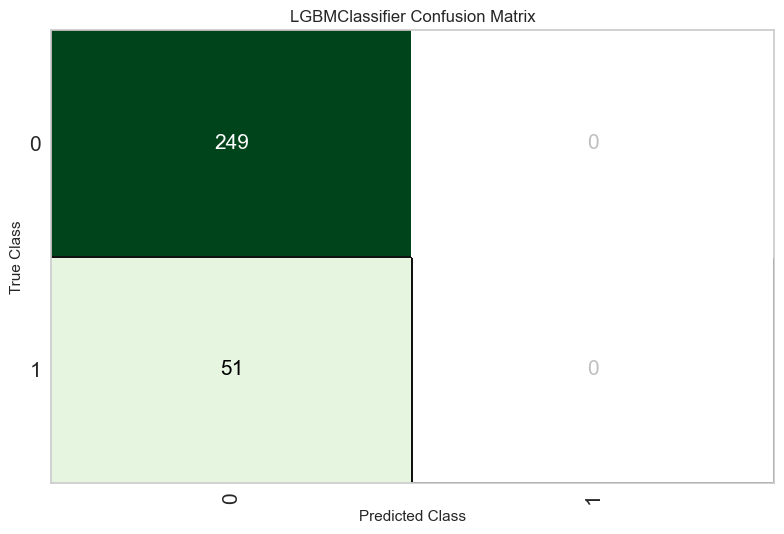

In [129]:
plot_model(tuned_lightgbm,plot='confusion_matrix')

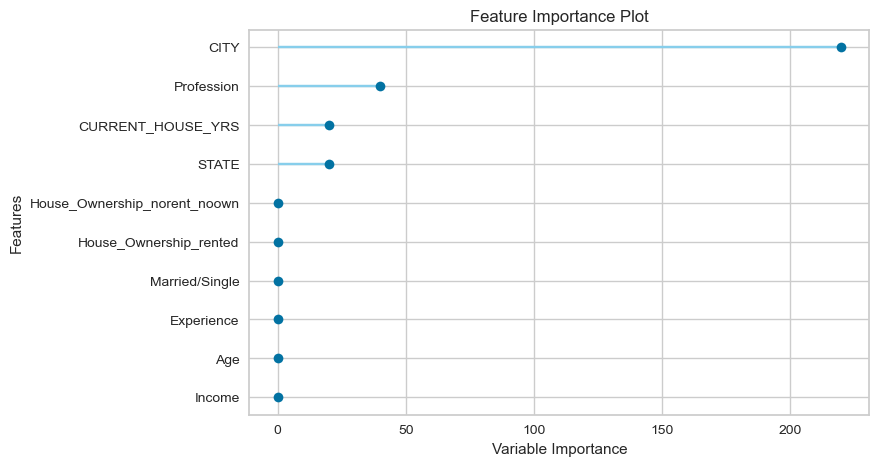

In [128]:
plot_model(tuned_lightgbm,plot='feature')

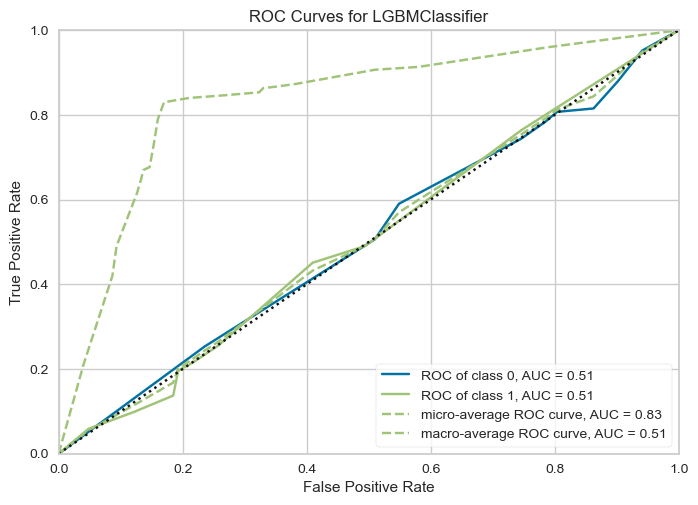

In [130]:
plot_model(tuned_lightgbm,plot='auc')

In [111]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.4892,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8429,0.6171,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.6473,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.4749,0.0833,0.5000,0.1429,0.0987,0.1495
4,0.8286,0.4468,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8286,0.5984,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8286,0.6825,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8286,0.4217,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8286,0.5934,0.0833,0.5000,0.1429,0.0987,0.1495


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [112]:

dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [113]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.4992,0.1818,0.1429,0.1600,-0.0194,-0.0196
1,0.7000,0.4545,0.0909,0.0833,0.0870,-0.0921,-0.0922
2,0.7143,0.5237,0.2500,0.2143,0.2308,0.0566,0.0569
3,0.7286,0.5575,0.1667,0.1818,0.1739,0.0119,0.0119
4,0.8000,0.5970,0.3333,0.4000,0.3636,0.2462,0.2476
5,0.6714,0.4741,0.2500,0.1765,0.2069,0.0074,0.0076
6,0.8000,0.5761,0.3333,0.4000,0.3636,0.2462,0.2476
7,0.7143,0.5136,0.2500,0.2143,0.2308,0.0566,0.0569
8,0.7571,0.6149,0.3333,0.3077,0.3200,0.1725,0.1727


Fitting 10 folds for each of 7 candidates, totalling 70 fits



✅ Ensemble Model

In [114]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:27:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7429,0.4145,0.1818,0.1818,0.1818,0.0293,0.0293
1,0.7571,0.4877,0.0000,0.0000,0.0000,-0.1248,-0.1322
2,0.8143,0.4885,0.1667,0.4000,0.2353,0.1495,0.1682
3,0.8143,0.5776,0.2500,0.4286,0.3158,0.2169,0.2274
4,0.8143,0.6552,0.1667,0.4000,0.2353,0.1495,0.1682
5,0.7000,0.4504,0.0000,0.0000,0.0000,-0.1722,-0.1747
6,0.8571,0.5517,0.2500,0.7500,0.3750,0.3164,0.3779
7,0.7857,0.4849,0.2500,0.3333,0.2857,0.1627,0.1650
8,0.7857,0.6422,0.3333,0.3636,0.3478,0.2199,0.2202


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [115]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6714,0.5092,0.2727,0.1667,0.2069,0.0147,0.0154
1,0.7000,0.4522,0.0909,0.0833,0.0870,-0.0921,-0.0922
2,0.7429,0.5474,0.2500,0.2500,0.2500,0.0948,0.0948
3,0.7143,0.4971,0.1667,0.1667,0.1667,-0.0057,-0.0057
4,0.7714,0.5647,0.2500,0.3000,0.2727,0.1385,0.1393
5,0.7143,0.5302,0.2500,0.2143,0.2308,0.0566,0.0569
6,0.8000,0.5819,0.2500,0.3750,0.3000,0.1887,0.1940
7,0.7000,0.5216,0.2500,0.2000,0.2222,0.0392,0.0396
8,0.7429,0.5474,0.2500,0.2500,0.2500,0.0948,0.0948


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

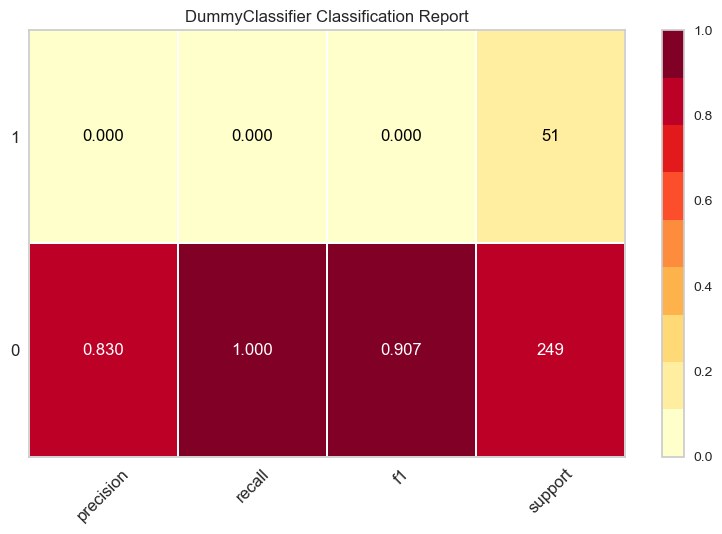

In [116]:
# plot class report
plot_model(best, plot = 'class_report')

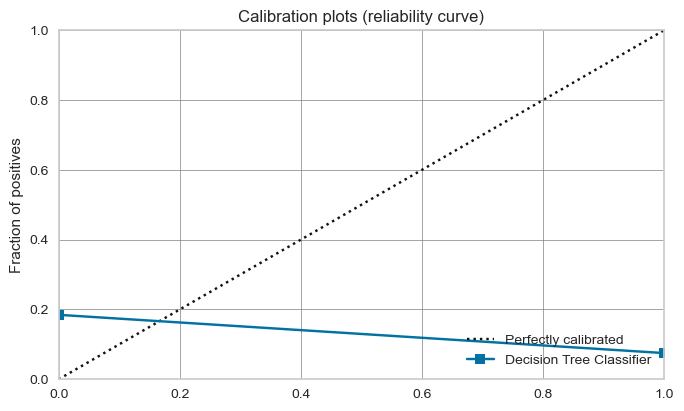

In [117]:
# check calbiration of default dt
plot_model(dt, plot = 'calibration')

In [118]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7714,0.4823,0.0000,0.0000,0.0000,-0.1089,-0.1198
1,0.8429,0.5100,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7714,0.4619,0.0000,0.0000,0.0000,-0.0938,-0.1120
3,0.8286,0.5761,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8143,0.6537,0.0833,0.3333,0.1333,0.0695,0.0909
5,0.7571,0.4526,0.0000,0.0000,0.0000,-0.1121,-0.1262
6,0.8286,0.5582,0.0833,0.5000,0.1429,0.0987,0.1495
7,0.8571,0.5180,0.2500,0.7500,0.3750,0.3164,0.3779
8,0.8429,0.6178,0.1667,0.6667,0.2667,0.2127,0.2781


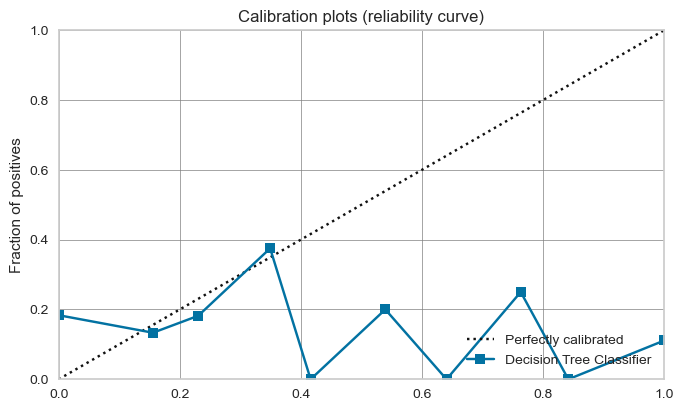

In [119]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

In [120]:
# get leaderboard
lb = get_leaderboard()
lb

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:27:25
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.7743,0.5859,0.1174,0.2044,0.1447,0.0286,0.0307
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7886,0.5375,0.1008,0.2017,0.1319,0.0332,0.0336
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.3014,0.6033,0.9500,0.1882,0.3141,0.0457,0.1285
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7400,0.5359,0.2280,0.2285,0.2259,0.0716,0.0719
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.7400,0.6012,0.1424,0.1754,0.1535,0.0060,0.0057
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7700,0.5665,0.1258,0.1776,0.1450,0.0244,0.0220
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7971,0.5639,0.1424,0.2842,0.1832,0.0853,0.0934
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.4386,0.5862,0.7803,0.2074,0.3161,0.0756,0.1364
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7500,0.5760,0.2008,0.2500,0.2164,0.0718,0.0749


<Axes: ylabel='Index'>

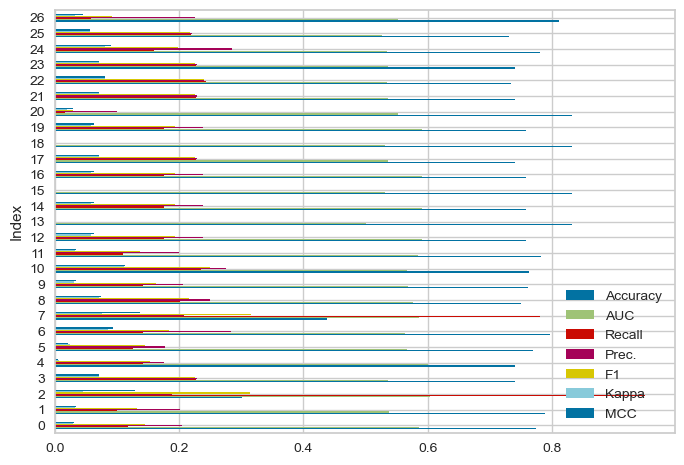

In [121]:
lb.plot(kind='barh')


✅ Check Fairness

In [122]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Dumping Model into a Pickle File 

In [123]:
import pickle

with open('lightgbm_model.pkl','wb') as file:
    pickle.dump(tuned_lightgbm,file)

In [124]:
import pickle

# Load the model from the pickle file
with open('lightgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
predictions = predict_model(loaded_model, data=new_data)

# Display the predictions
print(predictions)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
      Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0    1303834   23           3         single          rented            no   
1    7574516   40          10         single          rented            no   
2    3991815   66           4        married          rented        

In [125]:
predictions

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,prediction_label,prediction_score
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0.8314
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0.8314
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0.8314
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,0,0.8314
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,0,0.8314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6907195,55,5,single,owned,no,Police_officer,Dharmavaram,Andhra_Pradesh,3,10,0,0.8314
996,9253093,54,2,single,rented,yes,Secretary,Danapur,Bihar,2,12,0,0.8314
997,9464966,67,14,single,norent_noown,yes,Statistician,Tiruppur,Tamil_Nadu,14,10,0,0.8314
998,3346084,23,18,single,rented,no,Web_designer,Sambalpur,Odisha,6,13,0,0.8314


In [126]:
``

SyntaxError: invalid syntax (1016415176.py, line 1)